<a href="https://colab.research.google.com/github/omhirpara/Coding-Challenge-S22/blob/main/ACM_Research_Coding_Challenge_Spring_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import numpy as np
import pandas as pd

df = pd.read_csv("mushrooms.csv")




In [99]:
df.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7158,e,b,s,g,f,n,f,w,b,g,e,?,s,k,w,w,p,w,t,p,w,n,g
2743,e,f,y,n,t,n,f,c,b,p,t,b,s,s,p,g,p,w,o,p,k,v,d
6485,p,f,s,e,f,y,f,c,n,b,t,?,k,s,w,w,p,w,o,e,w,v,p
4577,p,f,f,g,f,f,f,c,b,p,e,b,k,k,n,p,p,w,o,l,h,v,g
5018,p,x,f,y,f,f,f,c,b,h,e,b,k,k,n,n,p,w,o,l,h,v,d


In [100]:
df.shape

(8124, 23)

In [101]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [102]:
df = df.dropna()
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [103]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [104]:
df['is_edible'] = [1 if typ == 'e' else 0 for typ in df['class']]

In [105]:
df.drop('class', axis=1, inplace=True)

In [106]:
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,is_edible
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u,0
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g,1
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m,1
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u,0
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g,1


In [107]:
def handle_non_numerical_data(df):
  columns = df.columns.values

  for column in columns:
    text_digit_vals = {}
    def convert_to_int(val):
      return text_digit_vals[val]

    if df[column].dtype != np.int64 and df[column].dtype != np.float64:
      column_contents = df[column].values.tolist()
      unique_elements = set(column_contents)
      x = 0
      for unique in unique_elements:
        if unique not in text_digit_vals:
          text_digit_vals[unique] = x
          x += 1

      df[column] = list(map(convert_to_int, df[column]))

  return df

df = handle_non_numerical_data(df)
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,is_edible
0,1,2,2,1,8,1,0,0,4,1,0,2,2,8,8,0,3,1,4,3,4,0,0
1,1,2,3,1,1,1,0,1,4,1,3,2,2,8,8,0,3,1,4,2,1,4,1
2,3,2,9,1,3,1,0,1,3,1,3,2,2,8,8,0,3,1,4,2,1,2,1
3,1,3,9,1,8,1,0,0,3,1,0,2,2,8,8,0,3,1,4,3,4,0,0
4,1,2,5,0,2,1,1,1,4,0,0,2,2,8,8,0,3,1,1,2,2,4,1


In [108]:
from sklearn.model_selection import train_test_split

X = df.drop('is_edible', axis=1)
y = df['is_edible']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [109]:
X_train.shape, X_test.shape

((5686, 22), (2438, 22))

In [110]:
X_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
5921,1,2,4,1,0,1,0,1,10,0,1,2,1,8,8,0,3,1,4,7,0,0
1073,1,0,5,1,2,1,0,1,9,0,1,2,2,7,8,0,3,1,4,3,3,1
3710,1,0,5,0,0,1,0,1,9,1,1,0,0,2,3,0,3,1,3,7,0,1
144,1,3,3,1,1,1,0,1,4,1,3,2,2,8,8,0,3,1,4,3,1,4
5469,1,3,2,0,5,1,0,0,5,0,2,0,0,8,7,0,3,1,1,8,0,1


In [111]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [112]:
X_train_scaled[:3]

array([[ 0.18382141,  0.13973799,  0.11023005,  1.18543045, -1.06289816,
         0.16573041, -0.43507579,  0.66541793,  1.04053954, -0.8676257 ,
        -0.42926428,  0.71911398, -0.42251579,  0.62507037,  0.63663608,
         0.        ,  0.1514798 , -0.25508565,  0.89610321,  0.74269932,
        -0.91327414, -1.56421454],
       [ 0.18382141, -1.48677212,  0.49688524,  1.18543045, -0.1252457 ,
         0.16573041, -0.43507579,  0.66541793,  0.73578484, -0.8676257 ,
        -0.42926428,  0.71911398,  0.64903853,  0.15907455,  0.63663608,
         0.        ,  0.1514798 , -0.25508565,  0.89610321, -0.7880622 ,
         0.79472173, -0.97907481],
       [ 0.18382141, -1.48677212,  0.49688524, -0.84357543, -1.06289816,
         0.16573041, -0.43507579,  0.66541793,  0.73578484,  1.15257075,
        -0.42926428, -1.48930195, -1.4940701 , -2.17090456, -1.66347369,
         0.        ,  0.1514798 , -0.25508565,  0.1654977 ,  0.74269932,
        -0.91327414, -0.97907481]])

In [113]:
import tensorflow as tf
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [114]:
model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(lr=0.03),
    metrics = [
               tf.keras.metrics.BinaryAccuracy(name='accuracy'),
               tf.keras.metrics.Precision(name='precision'),
               tf.keras.metrics.Recall(name='recall')
    ]
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [115]:
history = model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
178/178 [==============================] - 1s 3ms/step - loss: 0.1371 - accuracy: 0.9761 - precision: 0.9747 - recall: 0.9793
Epoch 2/100
178/178 [==============================] - 1s 3ms/step - loss: 0.4508 - accuracy: 0.9778 - precision: 0.9806 - recall: 0.9766
Epoch 3/100
178/178 [==============================] - 1s 3ms/step - loss: 0.2360 - accuracy: 0.9453 - precision: 0.9490 - recall: 0.9454
Epoch 4/100
178/178 [==============================] - 1s 3ms/step - loss: 0.0234 - accuracy: 0.9879 - precision: 0.9990 - recall: 0.9776
Epoch 5/100
178/178 [==============================] - 1s 3ms/step - loss: 0.0154 - accuracy: 0.9900 - precision: 1.0000 - recall: 0.9807
Epoch 6/100
178/178 [==============================] - 1s 3ms/step - loss: 0.0154 - accuracy: 0.9900 - precision: 1.0000 - recall: 0.9807
Epoch 7/100
178/178 [==============================] - 1s 3ms/step - loss: 0.0153 - accuracy: 0.9900 - precision: 1.0000 - recall: 0.9807
Epoch 8/100
178/178 [=============

In [117]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 18)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

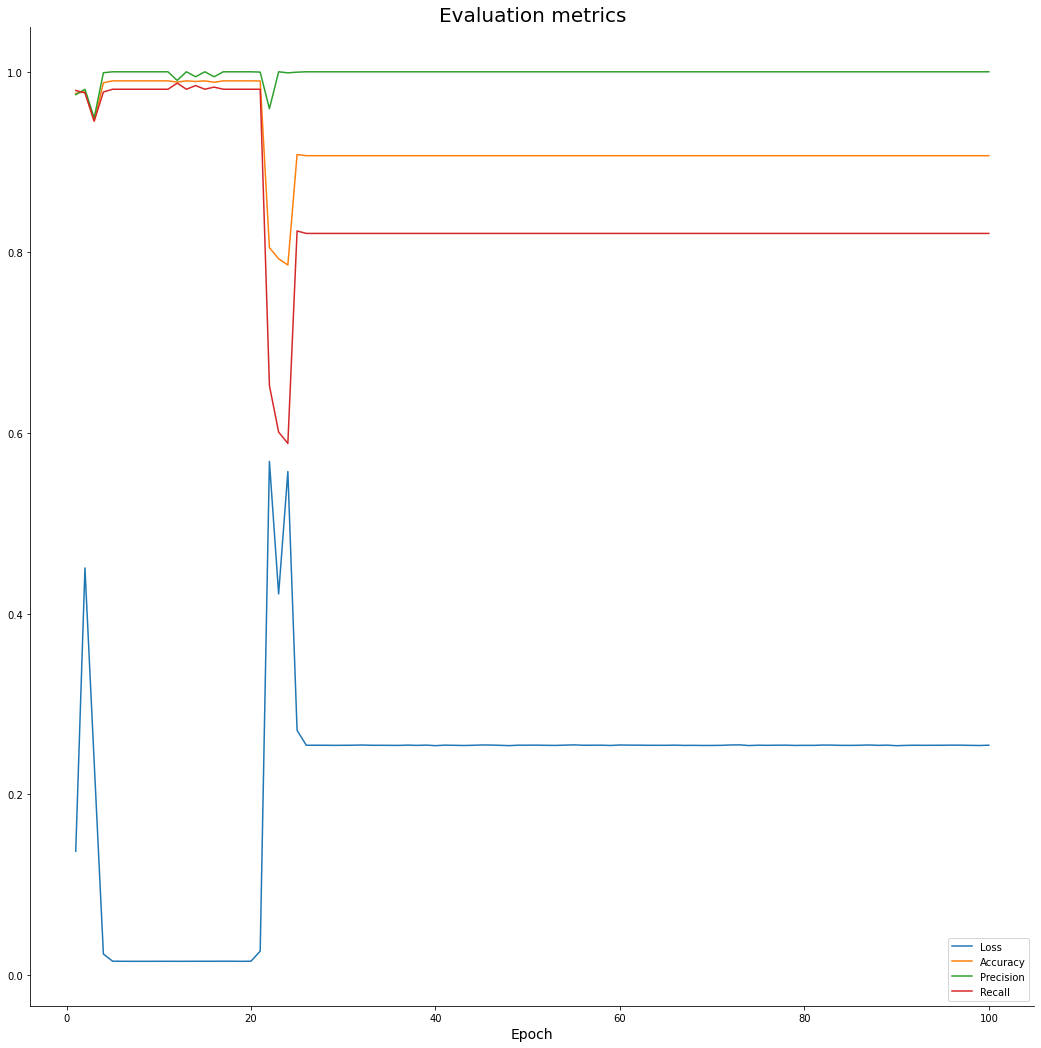

In [118]:
plt.plot(np.arange(1, 101), history.history['loss'], label='Loss')
plt.plot(np.arange(1, 101), history.history['accuracy'], label='Accuracy')
plt.plot(np.arange(1, 101), history.history['precision'], label='Precision')
plt.plot(np.arange(1, 101), history.history['recall'], label='Recall')
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [119]:
predictions = model.predict(X_test_scaled)

In [120]:
predictions

array([[1.        ],
       [0.15002966],
       [0.15002966],
       ...,
       [0.15002966],
       [1.        ],
       [1.        ]], dtype=float32)

In [121]:
predictions_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(predictions)]

In [126]:
# Assigns 1 if edible and 0 if poisonous
#print("Size of predictions_classes: ", len(predictions_classes))
print(predictions_classes)

[1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 

In [127]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions_classes))
# True Negatives: 1181
# False Negatives: 220
# False Positives: 0
# True Positives: 1037 

[[1181    0]
 [ 220 1037]]


In [128]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'Accuracy:  {accuracy_score(y_test, predictions_classes):.2f}')
print(f'Precision: {precision_score(y_test, predictions_classes):.2f}')
print(f'Recall:    {recall_score(y_test, predictions_classes):.2f}')

Accuracy:  0.91
Precision: 1.00
Recall:    0.82
